<a href="https://colab.research.google.com/github/PyBlin/Python/blob/main/AI_Class3/Second_Tutor/Keras_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.Intro

* MNIST 손글씨와 형태는 같지만 패션 아이템을 나타내는 이미지셋
* 10개의 클래스로 이루어진 28 x 28 픽셀 크기의 흑백 이미지 70000개
    * 6만개는 train, 1만개는 test
* 클래스마다 샘플이 더 다양하므로 손글씨보다 더 어려운 문제

# 1.Import

In [1]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.6.0
2.6.0


In [2]:
# dataset load
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
print(X_train_full.shape)   # train set 6만개, 이미지 크기는 28 x 28
print(X_train_full.dtype)   # 픽셀 강도는 0~255 흑백(gray scale)

(60000, 28, 28)
uint8


# 2.Data 가공

In [4]:
# 전체 훈련셋에서 검증셋(validation set) 추출
# 픽셀 강도를 0부터 1 사이로 정규화 작업 (마침표를 찍으면 부동소수점으로 인식)
X_valid, X_train = X_train_full[:50000]/255., X_train_full[50000:]/255.
y_valid, y_train = y_train_full[:50000], y_train_full[50000:]
X_test = X_test/255.

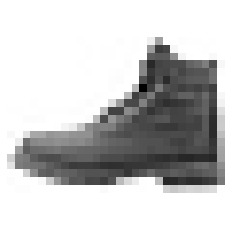

In [5]:
# 데이터 출력해보기
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

In [6]:
# 레이블(정답) 확인
y_train

array([9, 2, 1, ..., 3, 0, 5], dtype=uint8)

In [7]:
# 클래스별 이름을 나중에 사용하기 위해 지정하기
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 확인
class_names[y_train[0]]

'Ankle boot'

In [8]:
# 검증셋, 훈련셋 확인
print(X_valid.shape)
print(X_train.shape)

(50000, 28, 28)
(10000, 28, 28)


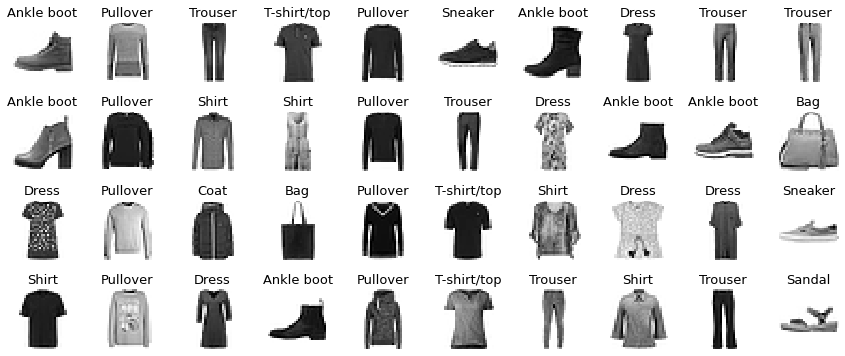

In [9]:
# 훈련셋에 있는 이미지를 40개 정도 출력 --> GIGO
n_rows, n_cols = 4, 10
plt.figure(figsize=(n_cols*1.5, n_rows*1.5))
for row in range(n_rows):
    for col in range(n_cols):
        id = n_cols * row + col
        plt.subplot(n_rows, n_cols, id+1)
        plt.imshow(X_train[id], cmap='binary', interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[id]], fontsize=13)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# 3.Sequential 방식으로 딥러닝 수행

In [10]:
# # 두 개의 은닉층으로 이루어진 분류 목적의 다층 perceptron 생성
# model = keras.models.Sequential()

# # 입력 데이터를 1차원으로 변환 (퍼셉트론은 1차원이 필요함)
# model.add(keras.layers.Flatten(input_shape=[28, 28]))

# # 뉴런 300개를 가진 Dense 은닉층 생성 (활성화 함수는 relu)
# model.add(keras.layers.Dense(300, activation='relu'))

# # 뉴런 100개를 가진 Dense 은닉층 생성 (활성화 함수는 relu)
# model.add(keras.layers.Dense(100, activation='relu'))

# # 출력층 : 각 클래스가 배타적 클래스이므로 활성화 함수는 softmax가 좋음
# model.add(keras.layers.Dense(10, activation='softmax'))

In [11]:
# seed 고정
import numpy as np

np.random.seed(1)
tf.random.set_seed(11)

In [12]:
# model 구조 정의
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]), 
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# model 확인
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


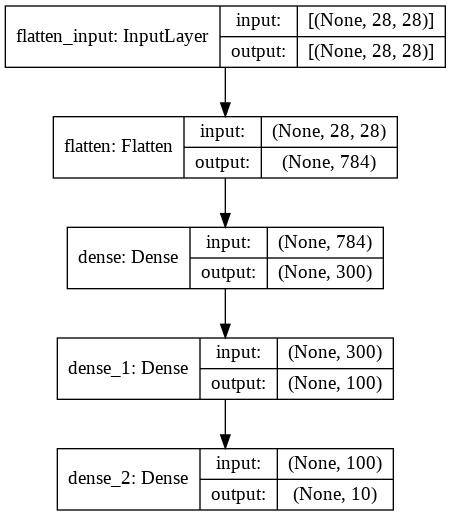

In [13]:
# 진행 과정 이미지로 저장
keras.utils.plot_model(model, 'my_fashion_mnist_model.png', show_shapes=True)

In [14]:
# model 리스트 확인
model.layers

In [15]:
# model 인덱싱
hidden1 = model.layers[1]
hidden1.name

'dense'

In [16]:
# 가중치(weight)와 편향치(bias) 정보 확인
w, b = hidden1.get_weights()

print(w)
print('-'*70)
print(w.shape)

[[-0.03710717  0.04700797 -0.03085792 ...  0.03112832  0.02054519
  -0.06140526]
 [-0.02870625 -0.06450582  0.05742958 ... -0.07163583 -0.05783624
  -0.04152659]
 [-0.00340381 -0.03454791 -0.0307962  ... -0.04080732  0.00554062
   0.0022614 ]
 ...
 [-0.04738066  0.06104299 -0.05858127 ... -0.00518502  0.05044926
  -0.02615778]
 [-0.04065463  0.02912958  0.02597994 ... -0.04079549 -0.00521268
   0.05580018]
 [-0.00511177 -0.05902675  0.03827199 ...  0.02241714 -0.04937128
   0.06646445]]
----------------------------------------------------------------------
(784, 300)


In [17]:
print(b)
print('-'*70)
print(b.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
----------------------------------------------------------------------
(300,)


# 4.Model Compile

* 샘플마다 클래스 별 타깃 확률을 가지고 있다면 --> one-hot vector
    * ex) class3 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
* 이 경우, `categorical_crossentropy` 사용하면 좋음
* ###################################################
* 하지만 패션 데이터는 레이블이 정수 하나로 이루어져 있음
    * 즉, 샘플마다 타깃 클래스 인덱스가 하나임 (클래스가 각각 배타적임)
* 이 경우, `sparse_categorical_crossentropy` 사용하면 좋음
* ###################################################
* 하나 또는 그 이상의 이진 레이블을 가진 이진 분류를 수행한다면
    * 출력층에서 활성화 함수 : softmax 보다는 sigmoid가 더 좋음
    * `loss = 'binary_crossentropy'`

In [18]:
# model compile
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',  # sgd : 경사하강법
              metrics=['accuracy']) # 잘 진행되고 있는지 체크

# model train (훈련셋:검증셋 = 8:2)
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid))

Epoch 1/30
313/313 [==============================] - 4s 13ms/step - loss: 1.2326 - accuracy: 0.6354 - val_loss: 0.8375 - val_accuracy: 0.7192
Epoch 2/30
313/313 [==============================] - 3s 11ms/step - loss: 0.7283 - accuracy: 0.7613 - val_loss: 0.6827 - val_accuracy: 0.7669
Epoch 3/30
313/313 [==============================] - 3s 11ms/step - loss: 0.6258 - accuracy: 0.7870 - val_loss: 0.5946 - val_accuracy: 0.8037
Epoch 4/30
313/313 [==============================] - 3s 11ms/step - loss: 0.5745 - accuracy: 0.8057 - val_loss: 0.6074 - val_accuracy: 0.7933
Epoch 5/30
313/313 [==============================] - 3s 11ms/step - loss: 0.5392 - accuracy: 0.8149 - val_loss: 0.5294 - val_accuracy: 0.8181
Epoch 6/30
313/313 [==============================] - 3s 11ms/step - loss: 0.5162 - accuracy: 0.8181 - val_loss: 0.5669 - val_accuracy: 0.8113
Epoch 7/30
313/313 [==============================] - 4s 12ms/step - loss: 0.4955 - accuracy: 0.8280 - val_loss: 0.4898 - val_accuracy: 0.8316

In [19]:
# 훈련에 들어있는 옵션 확인
history.params

{'epochs': 30, 'steps': 313, 'verbose': 1}

In [20]:
# 가장 중요한 속성 --> 검증셋에 대한 손실과 측정한 지표를 담은 딕셔너리
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

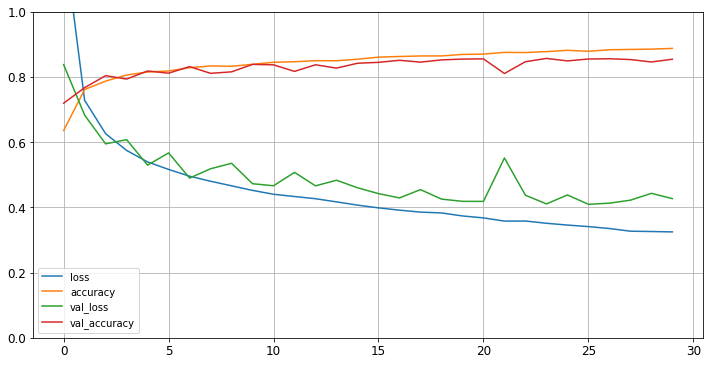

In [21]:
# 위 속성을 이용해 학습 곡선 보기
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(12, 6))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# 5.Model Evaluation

In [22]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4552 - accuracy: 0.8481


[0.4552365243434906, 0.8481000065803528]

In [23]:
# 학습한 모델을 사용해 예측(분류)
# 원래 새로운 데이터로 해야함
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba

array([[1.18953016e-04, 1.51876913e-04, 1.06641099e-04, 4.18809868e-05,
        1.03501397e-05, 9.33998078e-02, 6.70200243e-05, 1.80933207e-01,
        1.12121133e-02, 7.13958144e-01],
       [6.07116788e-04, 1.19412562e-06, 9.89914060e-01, 2.18802279e-06,
        5.02424547e-03, 3.30169918e-08, 4.36716154e-03, 2.10313855e-09,
        8.38494598e-05, 1.25857269e-09],
       [1.25931940e-04, 9.99828100e-01, 6.53901952e-06, 4.42240798e-06,
        3.45760382e-05, 6.18221474e-10, 2.49842458e-08, 8.05253251e-08,
        1.94746718e-07, 9.67743929e-09]], dtype=float32)

In [24]:
# 알아보기 힘드니까 가공
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.18, 0.01, 0.71],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

* 첫 번째 이미지는 "클래스9"라고 77% 확률로 예측
* 두 번째 이미지는 "클래스2"라고 100% 확률로 예측
* 세 번째 이미지는 "클래스1"이라고 100% 확률로 예측

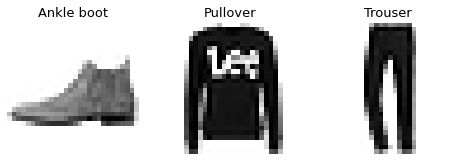

In [25]:
# 최종 확인
plt.figure(figsize=(8, 3))
for id, img in enumerate(X_new):
    plt.subplot(1, 3, id+1)
    plt.imshow(img, cmap='binary', interpolation='nearest')
    plt.axis('off')
    plt.title(class_names[y_test[id]], fontsize=13)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()